In [1]:
import emat
import os

In [2]:
database_path = os.path.expanduser("~/EMAT-VE/ve-rspm-20200728.db")


In [3]:
db = emat.SQLiteDB(database_path)

In [4]:
scope = db.read_scope()

In [5]:
import emat_verspm

In [6]:
m = emat_verspm.VERSPModel(db=db)

changing cwd to /var/folders/js/bk_dt9015j79_f6bxnc44dsr0000gp/T/tmpgdckbbl0


In [7]:
m.scope

<emat.Scope with 8 uncertainties, 5 levers, 8 measures>

In [8]:
db.read_design_names(scope_name=None)

['ref', 'ad_hoc', 'lhs', 'lhs_2', 'ulhs']

In [9]:
x = db.read_experiment_all(scope_name=None, design_name='lhs_2', ensure_dtypes=True)

GHG Reduction

<xmle.Elem 'img' with 0 children>
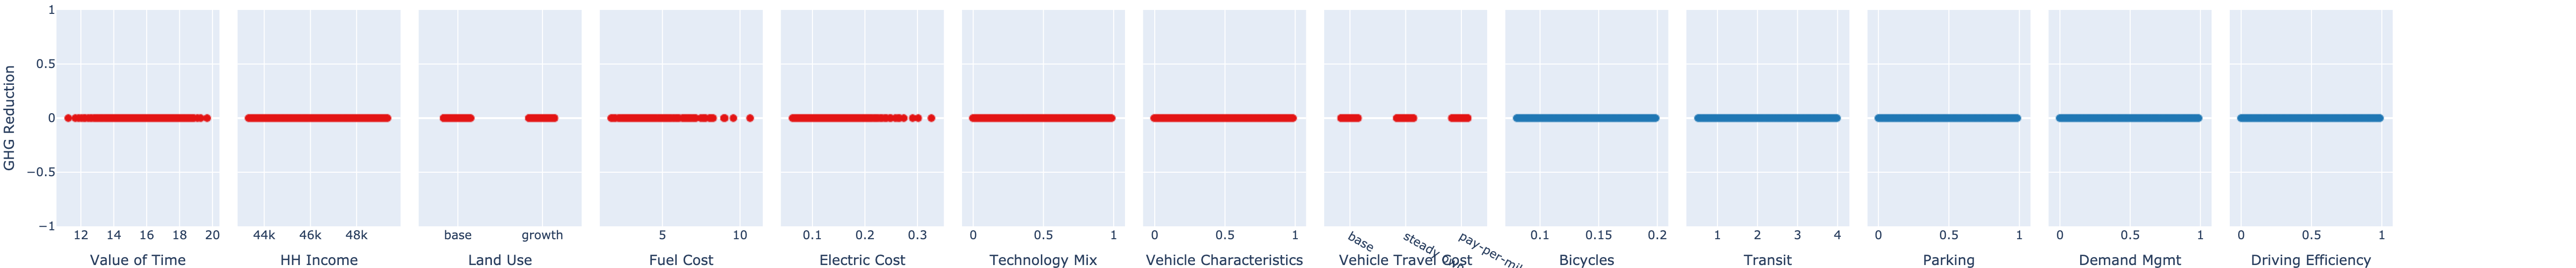

Daily VMT Per Capita

<xmle.Elem 'img' with 0 children>
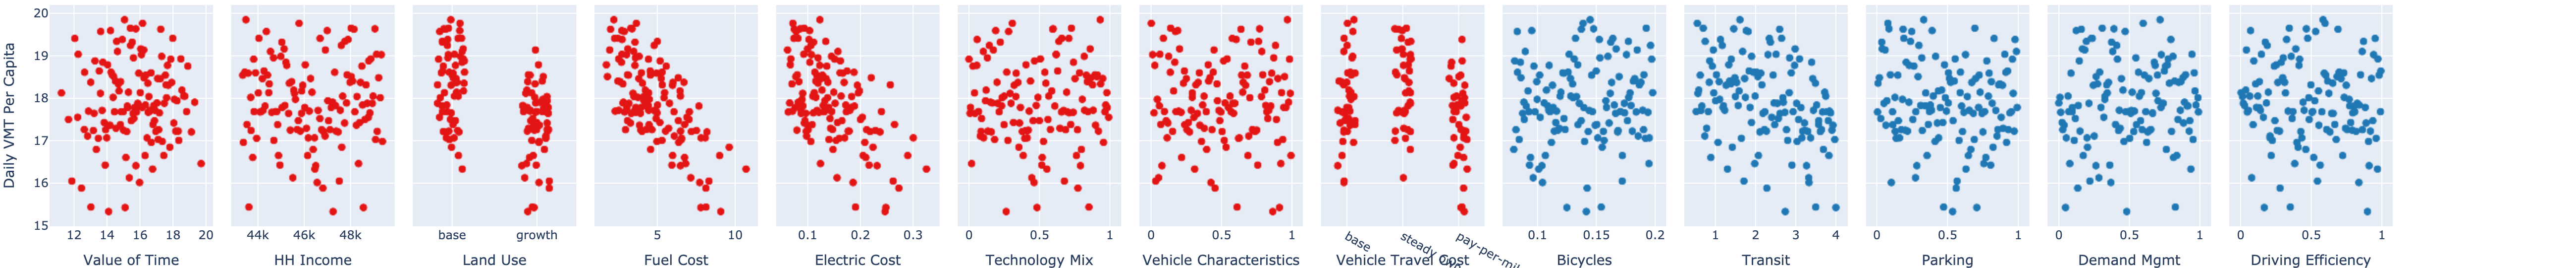

Daily Walk Travel Per Capita

<xmle.Elem 'img' with 0 children>
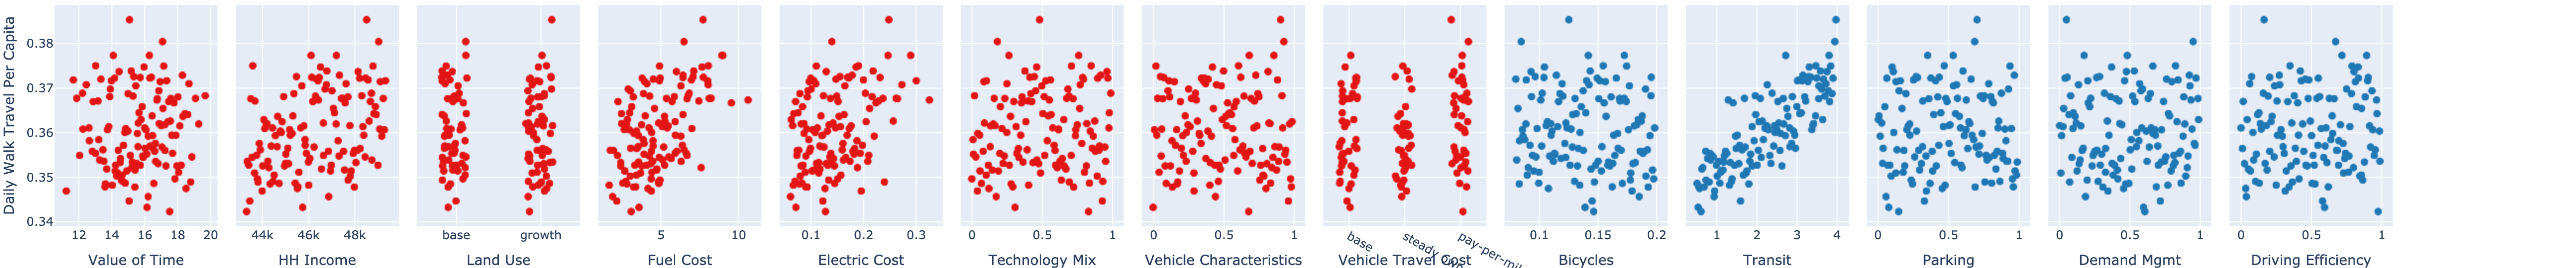

Air Pollution

<xmle.Elem 'img' with 0 children>
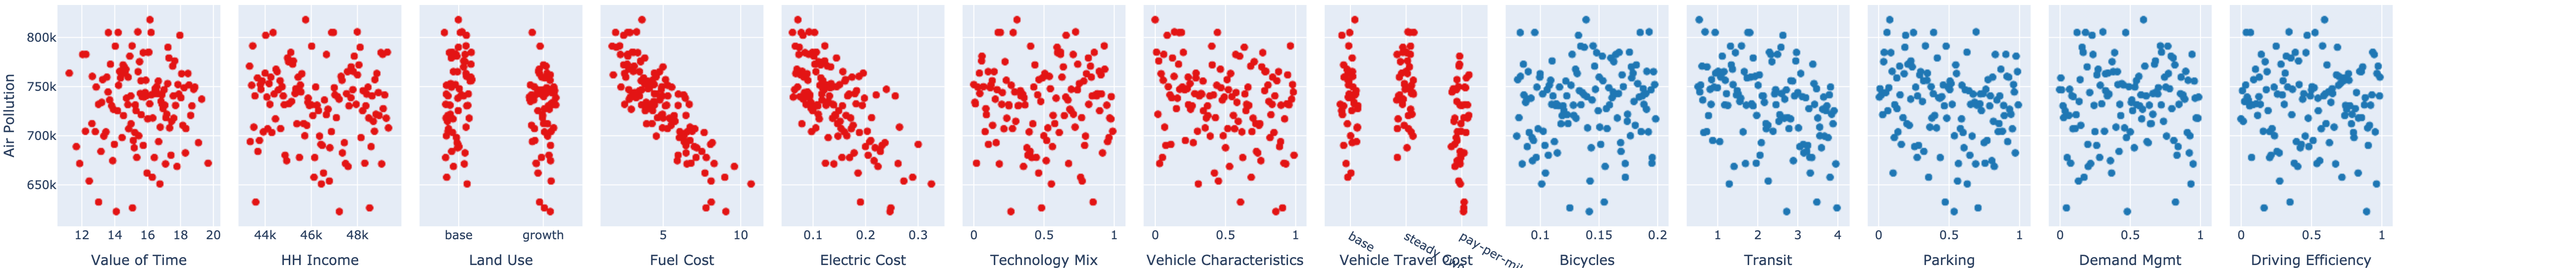

Annual Fuel Use

<xmle.Elem 'img' with 0 children>
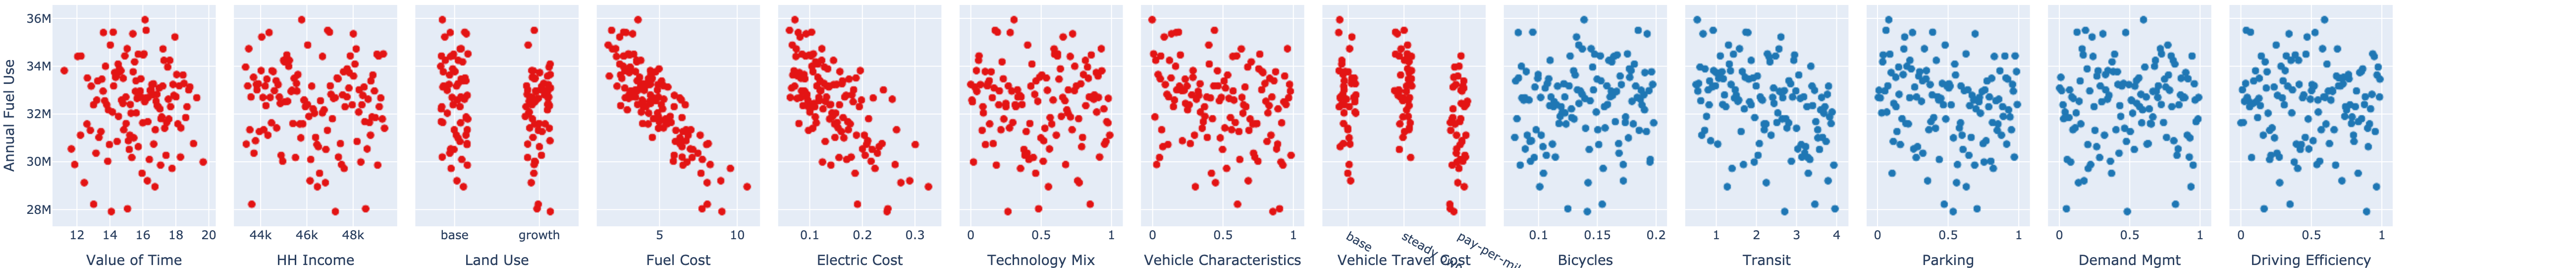

Daily Truck Hours Delay

<xmle.Elem 'img' with 0 children>
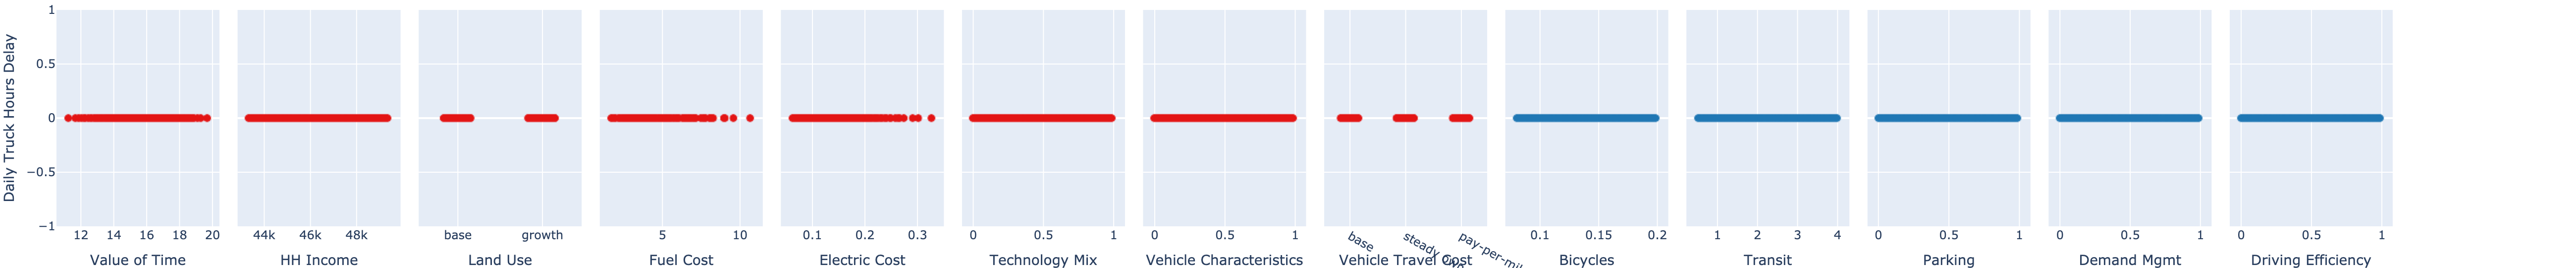

Vehicle Cost / Income

<xmle.Elem 'img' with 0 children>
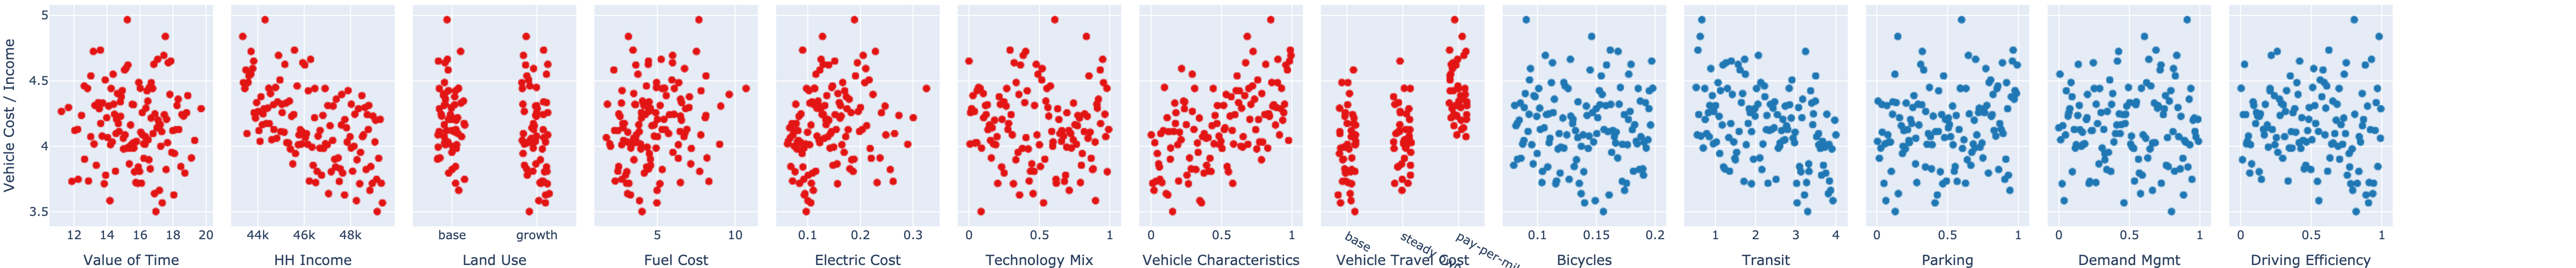

Low Income Veh. Cost / Income

<xmle.Elem 'img' with 0 children>
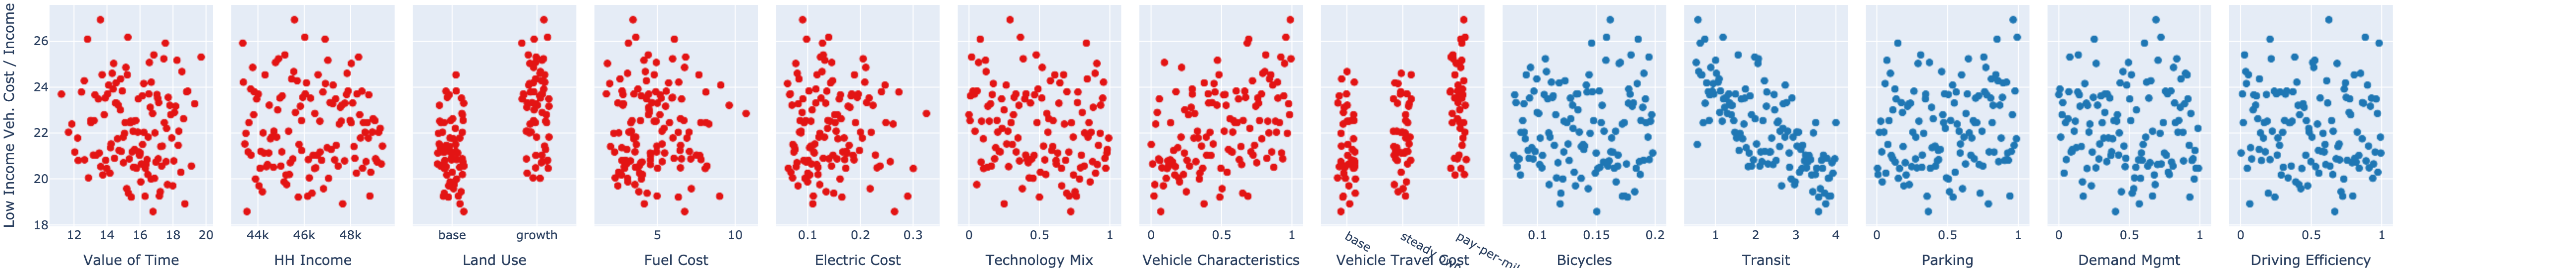

In [10]:
from emat.analysis import display_experiments
figs = display_experiments(m.scope, x)


In [11]:
from emat.analysis.explore_2 import Visualizer

In [12]:
viz = Visualizer(
    data=x, 
    scope=m.scope, 
    reference_point='ref',
    db=db,
)

In [13]:
ref = db.read_experiment_all(scope_name=None, design_name='ref', ensure_dtypes=True)
ref

ValueOfTime  Income LandUse  FuelCost  ElectricCost  TechMix  \
experiment                                                                 
1                  16.0   46367    base      2.43          0.08      0.0   

            VehicleCharacteristics VehicleTravelCost  Bicycles  Transit  ...  \
experiment                                                               ...   
1                              0.0              base      0.08      1.0  ...   

            DemandManagement  DrivingEfficiency  GHGReduction  DVMTPerCapita  \
experiment                                                                     
1                        0.0                0.0           0.0      20.564719   

            WalkTravelPerCapita  AirPollutionEm       FuelUse  TruckDelay  \
experiment                                                                  
1                      0.342725   855480.053614  3.755158e+07         0.0   

            VehicleCost  VehicleCostLow  
experiment                               
1              3.985622       21.143855  

[1 rows x 21 columns]

In [14]:
viz.complete()

In [15]:
viz.splom(
    rows=['AirPollutionEm', 'WalkTravelPerCapita', 'FuelUse'],
    cols=['AirPollutionEm', 'WalkTravelPerCapita', 'FuelUse', 'ValueOfTime'],
)

FigureWidget({
    'data': [{'hovertemplate': ('<b>Air Pollution</b>: %{y}<br>' ... 'tra>experiment %{meta}</e…

In [16]:
viz.hmm(
    rows=['AirPollutionEm', 'WalkTravelPerCapita', 'FuelUse'],
    cols=['AirPollutionEm', 'WalkTravelPerCapita', 'FuelUse', 'ValueOfTime'],
)

FigureWidget({
    'data': [{'coloraxis': 'coloraxis2',
              'hoverongaps': False,
              'hov…

In [17]:
STOP

NameError: name 'STOP' is not defined

## Metamodel

In [ ]:
mm = emat.create_metamodel(m.scope, x)

In [ ]:
mm_x1 = mm.design_experiments(n_samples=1000)

In [ ]:
mm_y1 = mm.run_experiments(mm_x1)

In [ ]:
viz1 = Visualizer(data=mm_y1, scope=m.scope, db=db, reference_point='ref',)

In [ ]:
viz1.complete()